In [1]:
# Nhập thư viện

import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder


In [4]:
# Nhập dữ liệu

data = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')

In [5]:
# Xem 5 dòng đầu của dữ liệu

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Xem 5 dòng cuối của dữ liệu

data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [7]:
# Xem 10 dòng ngẫu nhiên của dữ liệu

data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
282313,561642,23190,BUNDLE OF 3 SCHOOL EXERCISE BOOKS,1,7/28/2011 15:04,1.65,17965.0,United Kingdom
410891,572183,23119,PACK OF 6 LARGE FRUIT STRAWS,24,10/21/2011 10:50,0.62,16153.0,United Kingdom
143006,548663,21731,RED TOADSTOOL LED NIGHT LIGHT,1,4/1/2011 14:44,4.13,NaN,United Kingdom
380364,569769,23284,DOORMAT KEEP CALM AND COME IN,10,10/6/2011 11:28,7.08,13078.0,United Kingdom
356427,568051,21790,VINTAGE SNAP CARDS,12,9/23/2011 12:40,0.85,18189.0,United Kingdom
273591,560841,79144B,PAINTED LIGHTBULB STAR+ MOON,24,7/21/2011 12:25,0.37,14298.0,United Kingdom
258563,559660,23230,WRAP ALPHABET DESIGN,50,7/11/2011 13:19,0.42,16701.0,United Kingdom
212072,555406,90144,SILVER DROP EARRINGS WITH FLOWER,2,6/2/2011 19:50,3.75,17231.0,United Kingdom
489113,577938,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,1,11/22/2011 12:07,2.95,15525.0,United Kingdom
90450,544040,21399,BLUE POLKADOT COFFEE MUG,6,2/15/2011 11:40,2.10,14701.0,United Kingdom


In [8]:
# xem có bao nhiêu dòng, bao nhiêu cột

data.shape

(541909, 8)

In [9]:
# Xem thông tin của từng cột

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
# Xem tổng quát thông kê của dữ liệu

data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu
## Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao
## Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”

In [11]:
# Kiểm tra giá trị khuyết thiếu
data.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


Khi xem thông tin ở data.info thì thấy rằng cột CustomerID  có nhiều giá trị Na nhất 541909 - 406829 = 135,080 giá trị khuyết thiếu
 chiếm 24.9 % tập dữ liệu.
 Do vậy không nên xoá các dòng chứa NA này
 

In [14]:
# Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”

data.fillna('Không biết')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice
# Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch 
# Mô tả thông tin của bộ dữ liệu trên và nhận xét

In [16]:
# Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice

<Axes: >

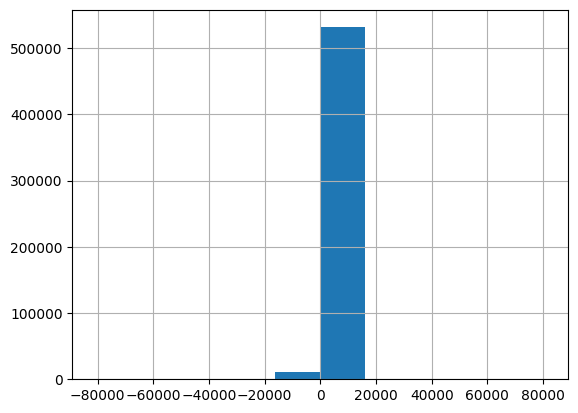

In [19]:
# Phát hiện giá trị ngoại lai của cột Quantity

data['Quantity'].hist()

<Axes: >

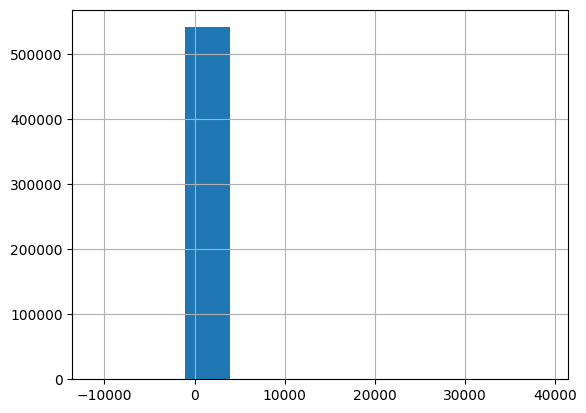

In [21]:
data['UnitPrice'].hist()

In [23]:
data['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [24]:
data['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [22]:

# ngoại lai của Quantity, UnitPrice đều có, xuất hiện các giá trị âm, một số mang giá trị lớn bất thường
# trong khi giá trị trung bình  Quantity, UnitPrice lần lượt là 9.552250	4.611114
# trong khi các giá trị min max lần lượt như sau:
# min: Quantity	-80995	UnitPrice: -11062
# max:	Quantity 80995	UnitPrice: 38970

# Lọc giá trị ngoại lai cột Quantity


In [35]:
# lọc giá trị ngoại lai cột Quantity

Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)


9.0


In [36]:
# xác định khoảng trên và khoảng dưới

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print(lower_bound)
print(upper_bound)

-12.5
23.5


In [37]:
# lọc giá trị ngoại lai

data_quantity_outlier = data[(data['Quantity'] < lower_bound) | (data['Quantity'] > upper_bound)]
data_quantity_outlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France
...,...,...,...,...,...,...,...,...
541876,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,12/9/2011 12:31,0.85,15804.0,United Kingdom
541882,581585,21916,SET 12 RETRO WHITE CHALK STICKS,24,12/9/2011 12:31,0.42,15804.0,United Kingdom
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/2011 12:31,0.42,15804.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom


In [38]:
# Tập dữ liệu không chứa outlier của cột Quantity

data_quantity = data[~((data['Quantity'] < lower_bound) | (data['Quantity'] > upper_bound))]
data_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Lọc giá trị ngoại lai cột UnitPrice


In [39]:
# Tìm IQR của cột UnitPrice
Q1_UP = data['UnitPrice'].quantile(0.25)
Q3_UP = data['UnitPrice'].quantile(0.75)

IQR_UP = Q3_UP - Q1_UP
print(IQR_UP)


2.88


In [40]:
# xác định khoảng trên và khoảng dưới

upper_bound_up = Q3_UP + 1.5*IQR_UP
lower_bound_up = Q1_UP - 1.5*IQR_UP

print(lower_bound_up)
print(upper_bound_up)

-3.0700000000000003
8.45


In [41]:
# lọc giá trị ngoại lai của cột UnitPrice

data_UnitPrice_outlier = data[(data['UnitPrice'] < lower_bound_up) | (data['UnitPrice'] > upper_bound_up)]
data_UnitPrice_outlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,12/1/2010 8:34,9.95,13047.0,United Kingdom
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100.0,United Kingdom
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom
...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,12/9/2011 12:16,18.00,12713.0,Germany
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,12/9/2011 12:16,11.95,12713.0,Germany
541831,581579,22941,CHRISTMAS LIGHTS 10 REINDEER,4,12/9/2011 12:19,8.50,17581.0,United Kingdom
541849,581580,22894,TABLECLOTH RED APPLES DESIGN,2,12/9/2011 12:20,9.95,12748.0,United Kingdom


In [42]:
# Tập dữ liệu không chứa outlier của cột UnitPrice

data_UnitPrice = data[~((data['UnitPrice'] < lower_bound_up) | (data['UnitPrice'] > upper_bound_up))]
data_UnitPrice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [43]:
# Nhận xét:
# Tập DL có nhiều giá trị ngoại lai, bằng phương pháp sử dụng IQR để tách các giá trị ngoại lai ra khỏi tập dữ liệu.
# Cô cho mình hỏi thêm một tí là: khi táct giá trị ngoại lai theo cách này thì vãn còn tồn tại các giá trị âm, số lượng và đơn giá 
# thì không thể có số âm được, vậy mình có thể tách các giá trị âm này ra riêng, nhưng về khoảng trên để tách thì mình chưa nghĩ
# ra được. Vậy cách thứ 2 mà mình nghĩ này có khả thi không?